# PL/pgSQL function that returns a table

To define a function that returns a table, you use the following form of the create function statement:

```postgresql
create or replace function function_name (
   parameter_list
)
returns table ( column_list )
language plpgsql
as
$$
declare
-- variable declaration
begin
-- body
end;
$$; 
```

Instead of returning a single value, this syntax allows you to return a table with a specified column list:

```postgresql
returns table ( column_list )
```

# Sample Database

We will use the `film` table from the sample database for the demonstration:

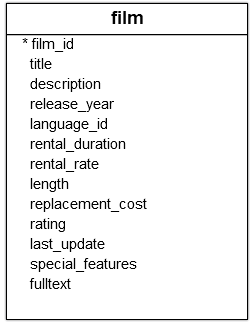

The following function returns all films whose titles match a particular pattern using the `ILIKE` operator.

```postgresql
create or replace function get_film (
  p_pattern varchar
)
returns table (
	film_title varchar,
	film_release_year int
)
language plpgsql
as $$
begin
	return query
		select
			title,
			release_year::integer
		from
			film
		where
			title ilike p_pattern;
end;
$$; 
```

* This `get_film(varchar)` accepts one parameter `p_pattern`, which is a pattern you want to match with the film title.
* The function returns a query set based on a select statement. 
* You need to ensure that the columns in the result set match those you define in the table after the `returns table` clause.
* Since the data type of the `release_year` column from the `film` table is not an integer, you need to cast it to an integer using the **cast operator** `::`.

The following shows how to call the `get_film()` function:

```postgresql
SELECT * FROM get_film ('Al%'); 
```

**Output:**

```
film_title    | film_release_year
------------------+-------------------
 Alabama Devil    |              2006
 Aladdin Calendar |              2006
 Alamo Videotape  |              2006
 Alaska Phantom   |              2006
 Ali Forever      |              2006
 Alice Fantasia   |              2006
 Alien Center     |              2006
 Alley Evolution  |              2006
 Alone Trip       |              2006
 Alter Victory    |              2006
(10 rows)
```

**If you call the function using the following statement, PostgreSQL returns a table that consists of one column that holds an array of rows:**

```postgresql
SELECT get_film ('Al%'); 
```

**Output:**

```
get_film
---------------------------
 ("Alabama Devil",2006)
 ("Aladdin Calendar",2006)
 ("Alamo Videotape",2006)
 ("Alaska Phantom",2006)
 ("Ali Forever",2006)
 ("Alice Fantasia",2006)
 ("Alien Center",2006)
 ("Alley Evolution",2006)
 ("Alone Trip",2006)
 ("Alter Victory",2006)
(10 rows)
```

**In practice, you often process each row before appending it to the function’s result set:**

```postgresql
create or replace function get_film (
	p_pattern varchar,
	p_year int
)
returns table (
	film_title varchar,
	film_release_year int
)
language plpgsql
as $$
declare
    var_r record;
begin
	for var_r in(
            select title, release_year
            from film
	     where title ilike p_pattern and
		    release_year = p_year
        ) loop  film_title := upper(var_r.title) ;
		film_release_year := var_r.release_year;
           return next;
	end loop;
end; $$ 
```

In this example, we create the `get_film(varchar,int)` that accepts two parameters:

* The `p_pattern` is used to search for films.
* The `p_year` is the release year of the films.

In the function body, we use a `for` loop statement to process the query, row by row.

The `return next` statement adds a row to the returned table of the function.

The following illustrates how to call the `get_film()` function:

```postgresql
SELECT * FROM get_film ('%er', 2006); 
```

**Output:**

```
film_title          | film_release_year
-----------------------------+-------------------
 ACE GOLDFINGER              |              2006
 ALI FOREVER                 |              2006
 ALIEN CENTER                |              2006
 AMISTAD MIDSUMMER           |              2006
 ARACHNOPHOBIA ROLLERCOASTER |              2006
 DYING MAKER                 |              2006
 BIRDCAGE CASPER             |              2006
...
```